In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
#Importando e visualizando a base 1
base= pd.read_csv('Mall_Customers_no_CustomersID.csv')
base.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


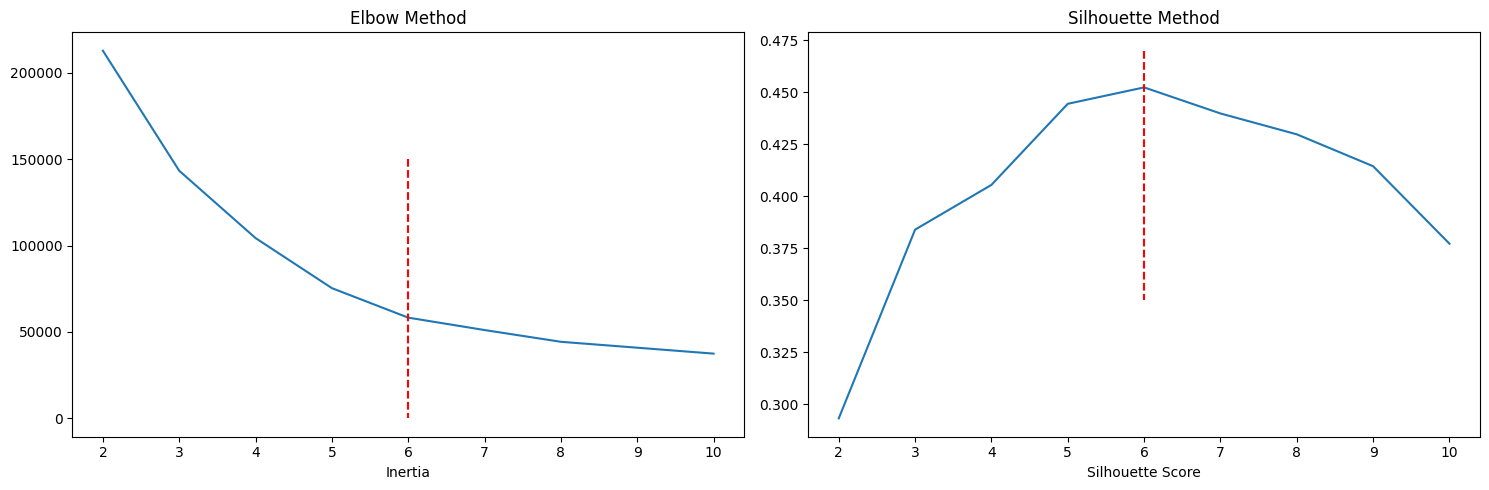

In [3]:
#Gerando o grafico para auxiliar na função para Kmeans
fig, axs = plt.subplots(ncols=2, figsize=(15, 5), tight_layout=True)

elbow = {}
silhouette = []
X = base.drop("Gender", axis=1)
k_range = range(2, 11)
RANDOM_STATE = 42

for i in k_range:
    kmeans = KMeans(n_clusters=i, random_state=RANDOM_STATE, n_init=10)
    kmeans.fit(X)
    elbow[i] = kmeans.inertia_
    labels = kmeans.labels_
    silhouette.append(silhouette_score(X, labels))

sns.lineplot(x=list(elbow.keys()), y=list(elbow.values()), ax=axs[0])
axs[0].set_xlabel('K')
axs[0].set_xlabel('Inertia')
axs[0].set_title('Elbow Method')
axs[0].plot([6,6],[150000,0],'--r')
sns.lineplot(x=list(k_range), y=silhouette, ax=axs[1])
axs[1].set_xlabel('K')
axs[1].set_xlabel('Silhouette Score')
axs[1].set_title('Silhouette Method')
axs[1].plot([6,6],[0.47,0.35],'--r')
plt.show()

#### Utilizando o Cotovelo = 6.

In [4]:
#Utilizando KMeans
kmeans = KMeans(n_clusters=6, random_state=RANDOM_STATE, n_init=10)
kmeans.fit(X)
kmeans.labels_

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 4,
       0, 3, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 1, 4, 1, 5, 1, 5, 1, 5, 1,
       4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1])

In [5]:
#Guardando dados
import joblib
joblib.dump(kmeans,"kmeans.pkl")

['kmeans.pkl']

In [6]:
#Guardando a base com cluster
base_clustered = base.copy()
base_clustered['cluster']=kmeans.labels_
base_clustered.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,0
1,Male,21,15,81,3
2,Female,20,16,6,0


In [7]:
#Guardando a base com cluster
base_clustered.to_csv("Mall_Customers_Clustered.csv",index=False)

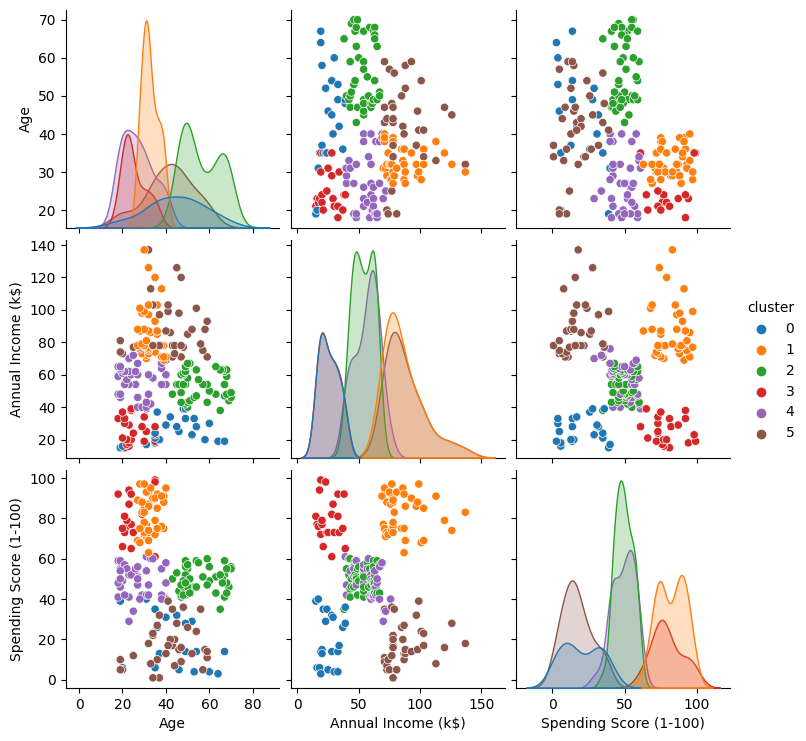

In [8]:
#Visualizando os graficos para encontrar os clusters.
sns.pairplot(base_clustered,diag_kind="kde",hue="cluster",palette="tab10")

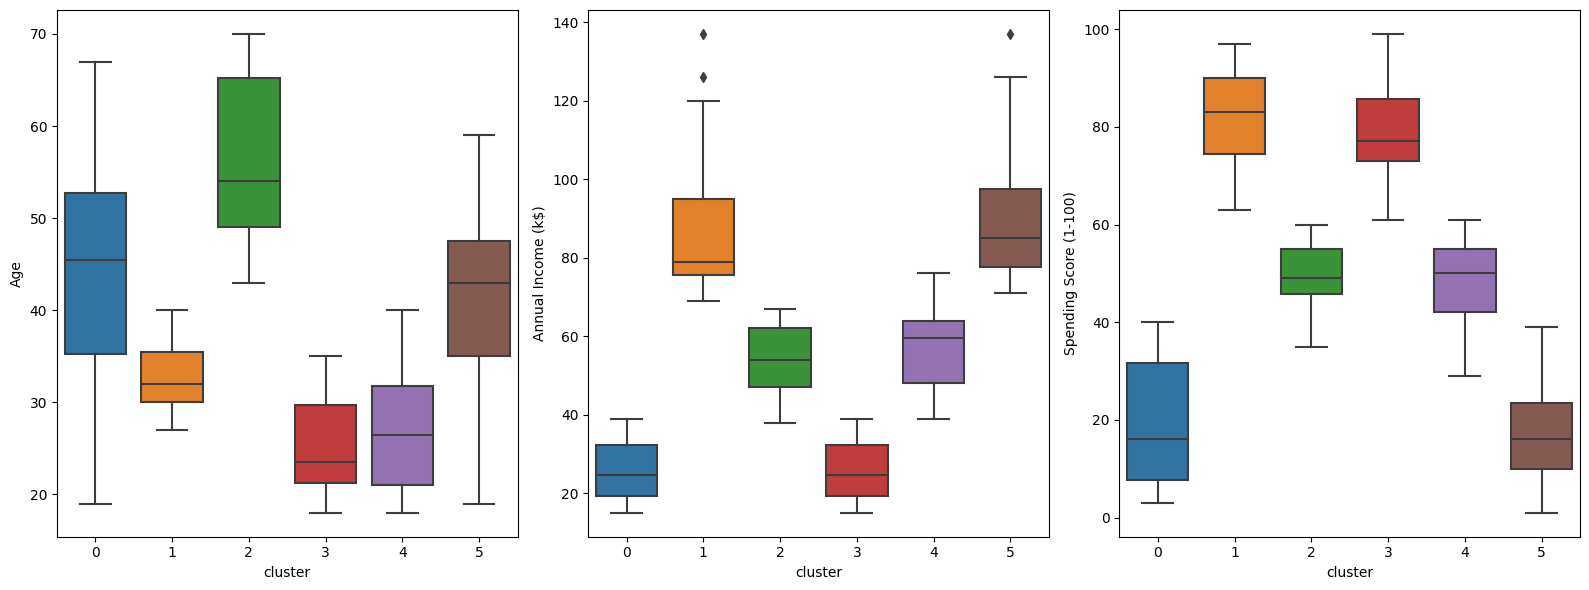

In [9]:
#Visualizando os Clusters
fig, axs = plt.subplots(ncols= 3,figsize=(16,6),tight_layout=True)
for ax, col in zip(axs,base_clustered.select_dtypes('number')):
    sns.boxplot(data=base_clustered,x="cluster",y=col, ax=ax)
plt.show()

#### Observações: 
- Cluster 0 são de pessoas de baixos salários e baixa pontuação.
- Cluster 1 são de pessoas maiores salários e com maiores pontuações
- Cluster 2 são de pessoas mais velhas, com salários e pontuação intermediarios. 
- Cluster 3 são de pessoas mais novas e com menores salários e maiores pontuações
- Cluster 4 são de pessoas jovens e pontuações medianas
- Cluster 5 são de pessoas mais ricas e com pontuações menores.

Pontuação de gastos | Renda | Idade | Número Cluster
--- | --- | --- | ---
Baixa | Baixa | Moderada | 0 
Alta | Alta | Jovem | 1
Moderada | Moderada | Alta | 2
Alta | Baixa | Jovem | 3
Moderada | Moderada | Jovem | 4
Baixa | Alta | Moderada | 5





In [10]:
#Verificando a quatidade de pontos por cluster em %
base_clustered['cluster'].value_counts(normalize=True).mul(100).sort_index()

cluster
0    11.0
1    19.5
2    22.0
3    11.0
4    19.0
5    17.5
Name: proportion, dtype: float64

In [11]:
#Verificando cluster por genero
base_clustered.groupby(['cluster','Gender']).size()
base_clustered.groupby(by=['cluster','Gender']).size()

cluster  Gender
0        Female    13
         Male       9
1        Female    21
         Male      18
2        Female    25
         Male      19
3        Female    13
         Male       9
4        Female    25
         Male      13
5        Female    15
         Male      20
dtype: int64

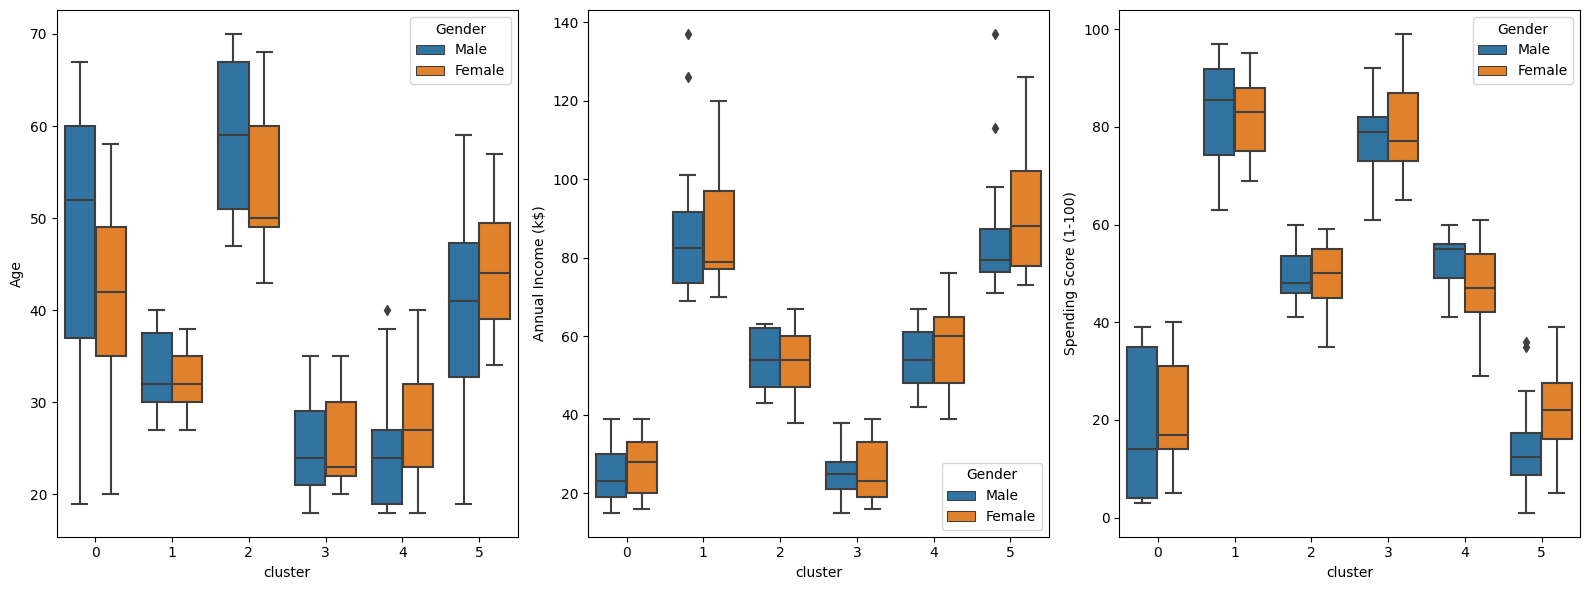

In [12]:
#Visualizando os Clusters
fig, axs = plt.subplots(ncols= 3,figsize=(16,6),tight_layout=True)
for ax, col in zip(axs,base_clustered.select_dtypes('number')):
    sns.boxplot(data=base_clustered,x="cluster",y=col, ax=ax, hue='Gender')
plt.show()

In [13]:
#Verificando os Centroides
print('Age | Annual Income (k$) | Spending Score (1-100)')
print(kmeans.cluster_centers_)

Age | Annual Income (k$) | Spending Score (1-100)
[[44.31818182 25.77272727 20.27272727]
 [32.69230769 86.53846154 82.12820513]
 [56.34090909 53.70454545 49.38636364]
 [25.27272727 25.72727273 79.36363636]
 [27.         56.65789474 49.13157895]
 [41.68571429 88.22857143 17.28571429]]


In [16]:
#Criando Função visualizar em 3d.
def visualizar_cluster(
    dataframe,
    colunas,
    quantidade_cores,
    mostrar_centroide=True, 
    mostrar_pontos=False
):
    
    #Grafico em 3d
    %matplotlib ipympl
    ax = plt.figure().add_subplot(projection='3d')
    #Deixar as cores dos demais pontos iguais as do centroide
    from matplotlib.colors import ListedColormap
    cores= plt.cm.tab10.colors[:quantidade_cores]
    cores=ListedColormap(cores)
    centroide=kmeans.cluster_centers_
    #Pontos do cluster
    x=dataframe[colunas[0]]
    y=dataframe[colunas[1]]
    z=dataframe[colunas[2]]
    #Escolher o que mostrar no grafico
    ligar_centroide = mostrar_centroide
    ligar_pontos= mostrar_pontos
    #Looping para ingressar os pontos no grafico
    for i, centroid in enumerate(centroide):
        #Decidir mostrar os pontos
        if ligar_centroide:
            #Pontos Centroide
            ax.scatter(*centroid,s=500,alpha=0.7)
            ax.text(*centroid, f"{i}",horizontalalignment='center', 
                    verticalalignment='center', fontsize=15)
        if ligar_pontos:
            s= ax.scatter(x,y,z,c=base_clustered['cluster'], cmap=cores)
            ax.legend(*s.legend_elements(),bbox_to_anchor=(1.4,0.7))
    #legendas    
    ax.set_xlabel([colunas[0]])
    ax.set_ylabel([colunas[1]])
    ax.set_zlabel([colunas[2]])
    ax.set_title('Clusters')
    plt.show()

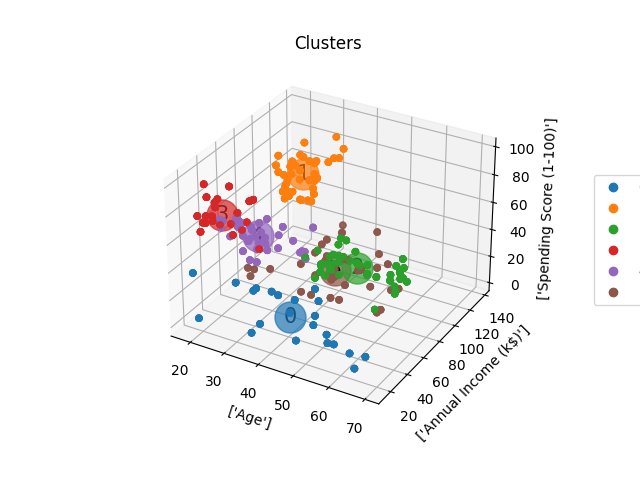

In [17]:
#Visualizando Grafico em 3d dos clusters
visualizar_cluster(base_clustered,base_clustered.columns[1:4],6,mostrar_centroide=True,mostrar_pontos=True)

- #### A função "visualizar_cluster()" e o gráfico Elbow e Silhouette serão exportados para um arquivo tipo .py para facilitar a leitura quando usados posteriormente.